In [2]:
#import libarys
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('raw_data/whitley_county_uneymployment.csv')
# Display the first few rows of the DataFrame
df.head()

,observation_date,KYWHIT5URN
0,1990-01-01,7.8
1,1990-02-01,8.4
2,1990-03-01,9.2
3,1990-04-01,7.7
4,1990-05-01,7.8


In [37]:
#rename the columns
df = df.rename(columns={'KYWHIT5URN': 'Uneymployment_Rate', 'observation_date': 'Date'})
# changes the column date to datetime format
df['Date'] = pd.to_datetime(df['Date'])
#prints the first few rows of the DataFrame
df.head()


,Date,Uneymployment_Rate
0,1990-01-01,7.8
1,1990-02-01,8.4
2,1990-03-01,9.2
3,1990-04-01,7.7
4,1990-05-01,7.8


In [ ]:
#dictonaries of presidents and their terms
democrat_presidents = {'Bill Clinton' : '1993-2001', 'Barack Obama' : '2009-2017', 'Biden' : '2021-2025'}
republican_presidents = {'George Bush' : '1989-1993', 'George W Bush' : '2001-2009', 'Donald Trump' : '2017-2021'}

The dictonaries will allow for easier ploting

In [ ]:
#more dictonaries this is adding colors to the presidents

dem_colors = {
    'Bill Clinton': 'royalblue',
    'Barack Obama': 'dodgerblue',
    'Biden': 'lightblue'
}

rep_colors = {
    'George Bush': 'darkred',
    'George W Bush': 'red',
    'Donald Trump': 'indianred'
}

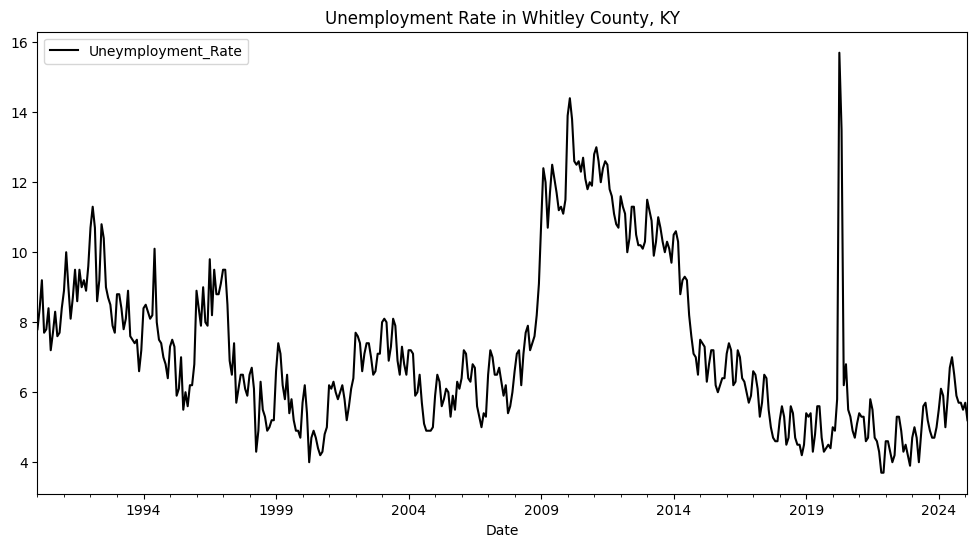

In [27]:
#plot the unemployment rate in Whitley County, KY
plot_one = df.plot(x='Date', y='Uneymployment_Rate', title='Unemployment Rate in Whitley County, KY', figsize=(12, 6), color='black')

In [47]:
#new DataFrame df_clean1
df_clean1 = df[['Date', 'Uneymployment_Rate']].copy()

In [ ]:
# Convert Date to year format for easier filtering
df_clean1['Year'] = df_clean1['Date'].dt.year

# Create a dictionary to store highest unemployment rates per president
highest_unemployment = {}

# Loop through Democratic Presidents
for president, term in democrat_presidents.items():
    start_year, end_year = map(int, term.split('-'))
    highest_unemployment[president] = df_clean1[
        (df_clean1['Year'] >= start_year) & (df_clean1['Year'] <= end_year)
    ]['Uneymployment_Rate'].max()

# Loop through Republican Presidents
for president, term in republican_presidents.items():
    start_year, end_year = map(int, term.split('-'))
    highest_unemployment[president] = df_clean1[
        (df_clean1['Year'] >= start_year) & (df_clean1['Year'] <= end_year)
    ]['Uneymployment_Rate'].max()

#print the highest unemployment rates
print(highest_unemployment)

{'Bill Clinton': np.float64(10.1), 'Barack Obama': np.float64(14.4), 'Biden': np.float64(7.0), 'George Bush': np.float64(11.3), 'George W Bush': np.float64(12.5), 'Donald Trump': np.float64(15.7)}


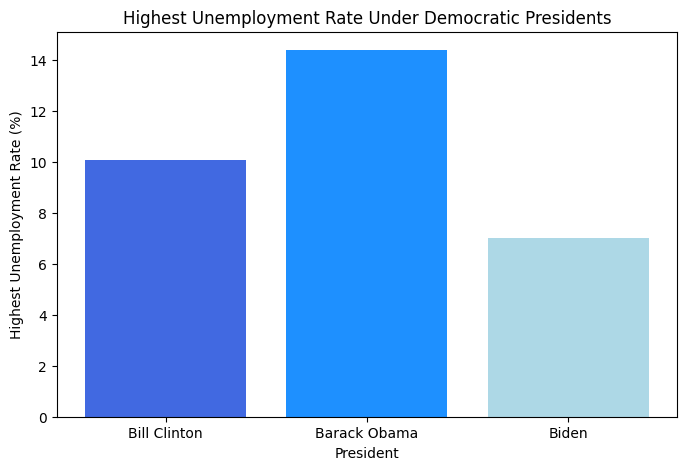

In [50]:

# Filter only Democratic presidents
dem_highest_unemployment = {president: highest_unemployment[president] for president in democrat_presidents}

# Assign colors from your dictionary
colors = [dem_colors[pres] for pres in dem_highest_unemployment.keys()]

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(dem_highest_unemployment.keys(), dem_highest_unemployment.values(), color=colors)

# Labels and title
plt.xlabel('President')
plt.ylabel('Highest Unemployment Rate (%)')
plt.title('Highest Unemployment Rate Under Democratic Presidents')

# Show plot
plt.show()

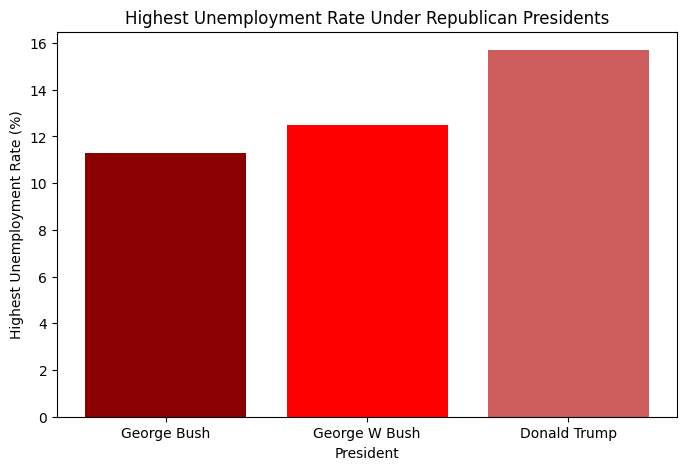

In [52]:
# Filter only Democratic presidents
republican_highest_unemployment = {president: highest_unemployment[president] for president in republican_presidents}

# Assign colors from your dictionary
colors = [rep_colors[pres] for pres in republican_highest_unemployment.keys()]

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(republican_highest_unemployment.keys(), republican_highest_unemployment.values(), color=colors)

# Labels and title
plt.xlabel('President')
plt.ylabel('Highest Unemployment Rate (%)')
plt.title('Highest Unemployment Rate Under Republican Presidents')

# Show plot
plt.show()